In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
dtypes_dict = {'age':'Int8', 
               'sex':'category', 
               'smoker':'category',
               'children': 'category',
               'region':'category', 
               'region (N/S)':'category', 
               'region (E/W)':'category', 
               'bmi category': 'category'}

df = pd.read_csv('../data/insurance_cleaned.csv', dtype=dtypes_dict)
df

,age,sex,bmi,children,smoker,region,charges,region (N/S),region (E/W),bmi category
0,19,female,27.900,0,yes,southwest,16884.92400,south,west,overweight
1,18,male,33.770,1,no,southeast,1725.55230,south,east,obese
2,28,male,33.000,3,no,southeast,4449.46200,south,east,obese
3,33,male,22.705,0,no,northwest,21984.47061,north,west,healthy weight
4,32,male,28.880,0,no,northwest,3866.85520,north,west,overweight
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,north,west,obese
1334,18,female,31.920,0,no,northeast,2205.98080,north,east,obese
1335,18,female,36.850,0,no,southeast,1629.83350,south,east,obese
1336,21,female,25.800,0,no,southwest,2007.94500,south,west,overweight


C:\Users\tb975\AppData\Local\Temp\ipykernel_14440\1124559311.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_group_avg = df.groupby(by=['sex'])['charges'].mean().reset_index()


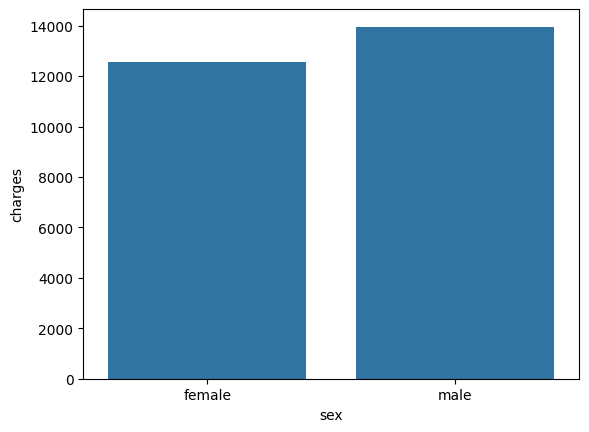

In [23]:
df_group_avg = df.groupby(by=['sex'])['charges'].mean().reset_index()

sns.barplot(data=df_group_avg, x='sex', y='charges')
plt.show()

If we count how many of the male and females are smokers this may explain why the average cost of men is greater than women

In [24]:
df_group_sex = df.groupby(by=['sex','smoker'])['charges'].count()
df_group_sex

C:\Users\tb975\AppData\Local\Temp\ipykernel_14440\222431993.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_group_sex = df.groupby(by=['sex','smoker'])['charges'].count()


sex     smoker
female  no        547
        yes       115
male    no        517
        yes       159
Name: charges, dtype: int64

In the male category, 44 more of them are smokers than the women. This may explain why the average cost of insurance is greater for men. 

# Re-categorise BMI into overweight and healthy weight

It may be more useful to categorise bmi into two categories, healthy weight and overweight. I have modified my function from before to reflect this. I have also decided to remove underweight just for the purposes of this analysis, so that I am just looking at a comparison between healthy weight and over weight - according to the NHS

In [9]:
def bmi_calculator (n):
    if n < 18.5:
        n = np.nan
    elif n >= 18.5 and n < 25:
        n = 'healthy weight'
    else:
        n = 'overweight'
    return n

df['bmi category'] = df['bmi'].apply(bmi_calculator)
df

,age,sex,bmi,children,smoker,region,charges,region (N/S),region (E/W),bmi category
0,19,female,27.900,0,yes,southwest,16884.92400,south,west,overweight
1,18,male,33.770,1,no,southeast,1725.55230,south,east,overweight
2,28,male,33.000,3,no,southeast,4449.46200,south,east,overweight
3,33,male,22.705,0,no,northwest,21984.47061,north,west,healthy weight
4,32,male,28.880,0,no,northwest,3866.85520,north,west,overweight
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,north,west,overweight
1334,18,female,31.920,0,no,northeast,2205.98080,north,east,overweight
1335,18,female,36.850,0,no,southeast,1629.83350,south,east,overweight
1336,21,female,25.800,0,no,southwest,2007.94500,south,west,overweight


In [10]:
#drop rows with BMI category 0 (i.e. get rid of underweight)
df.dropna(subset=['bmi category'], inplace = True, axis=0)
df

,age,sex,bmi,children,smoker,region,charges,region (N/S),region (E/W),bmi category
0,19,female,27.900,0,yes,southwest,16884.92400,south,west,overweight
1,18,male,33.770,1,no,southeast,1725.55230,south,east,overweight
2,28,male,33.000,3,no,southeast,4449.46200,south,east,overweight
3,33,male,22.705,0,no,northwest,21984.47061,north,west,healthy weight
4,32,male,28.880,0,no,northwest,3866.85520,north,west,overweight
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,north,west,overweight
1334,18,female,31.920,0,no,northeast,2205.98080,north,east,overweight
1335,18,female,36.850,0,no,southeast,1629.83350,south,east,overweight
1336,21,female,25.800,0,no,southwest,2007.94500,south,west,overweight


In [11]:
fig = px.scatter(df, x='age', y='charges', color='bmi category',
                 labels={
                     'age': 'Age (years)',
                     'charges':'Charges ($)',
                     'bmi category': 'BMI category'
                 },
                 title='Insurance charges against age, split into different categories of BMI')

fig.update_xaxes(showgrid=True, gridcolor='lightgrey')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey')
fig.update_xaxes(showline=True, linecolor='black', linewidth=1)
fig.update_yaxes(showline=True, linecolor='black', linewidth=1)

#y-axis is not currently at 0 so setting it to 0
fig.update_yaxes(range=[0, None])

fig.show()

It is now possible to see more clearly how being overweight changes your insurance costs. With smokers there were no smokers in the lower section of the graph where the clear age correlation is shown. There are some people with high BMI who are in the low section of the graph. In the upper section of the graph you have no heathly weight people. So having a higher BMI may lead to higher insurance costs, but these individuals may also be smokers, increasing their position on this graph